In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [13]:
dfm = pd.read_csv('fl_samplemformodel.csv', index_col=0)

In [14]:
dfm.shape

(660682, 15)

In [15]:
dfm.head()

,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS,DAY,MONTH,YEAR,WEEKDAY
0,United Air Lines Inc.,"Denver, CO","Minneapolis, MN",2,6.0,3,0.0,118.0,87.0,680.0,1,22,7,2022,4
1,Delta Air Lines Inc.,"Minneapolis, MN","San Francisco, CA",3,-1.0,4,24.0,260.0,249.0,1589.0,1,6,3,2023,0
2,Spirit Air Lines,"Orlando, FL","Dallas/Fort Worth, TX",4,-2.0,4,-1.0,181.0,153.0,985.0,0,23,2,2020,6
3,American Airlines Inc.,"Washington, DC","Boston, MA",2,-9.0,2,-29.0,109.0,58.0,399.0,0,11,6,2023,6
4,Spirit Air Lines,"Houston, TX","Los Angeles, CA",1,-3.0,2,-11.0,227.0,200.0,1379.0,0,12,2,2023,6


In [10]:
dfm.isna().sum()

AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS       

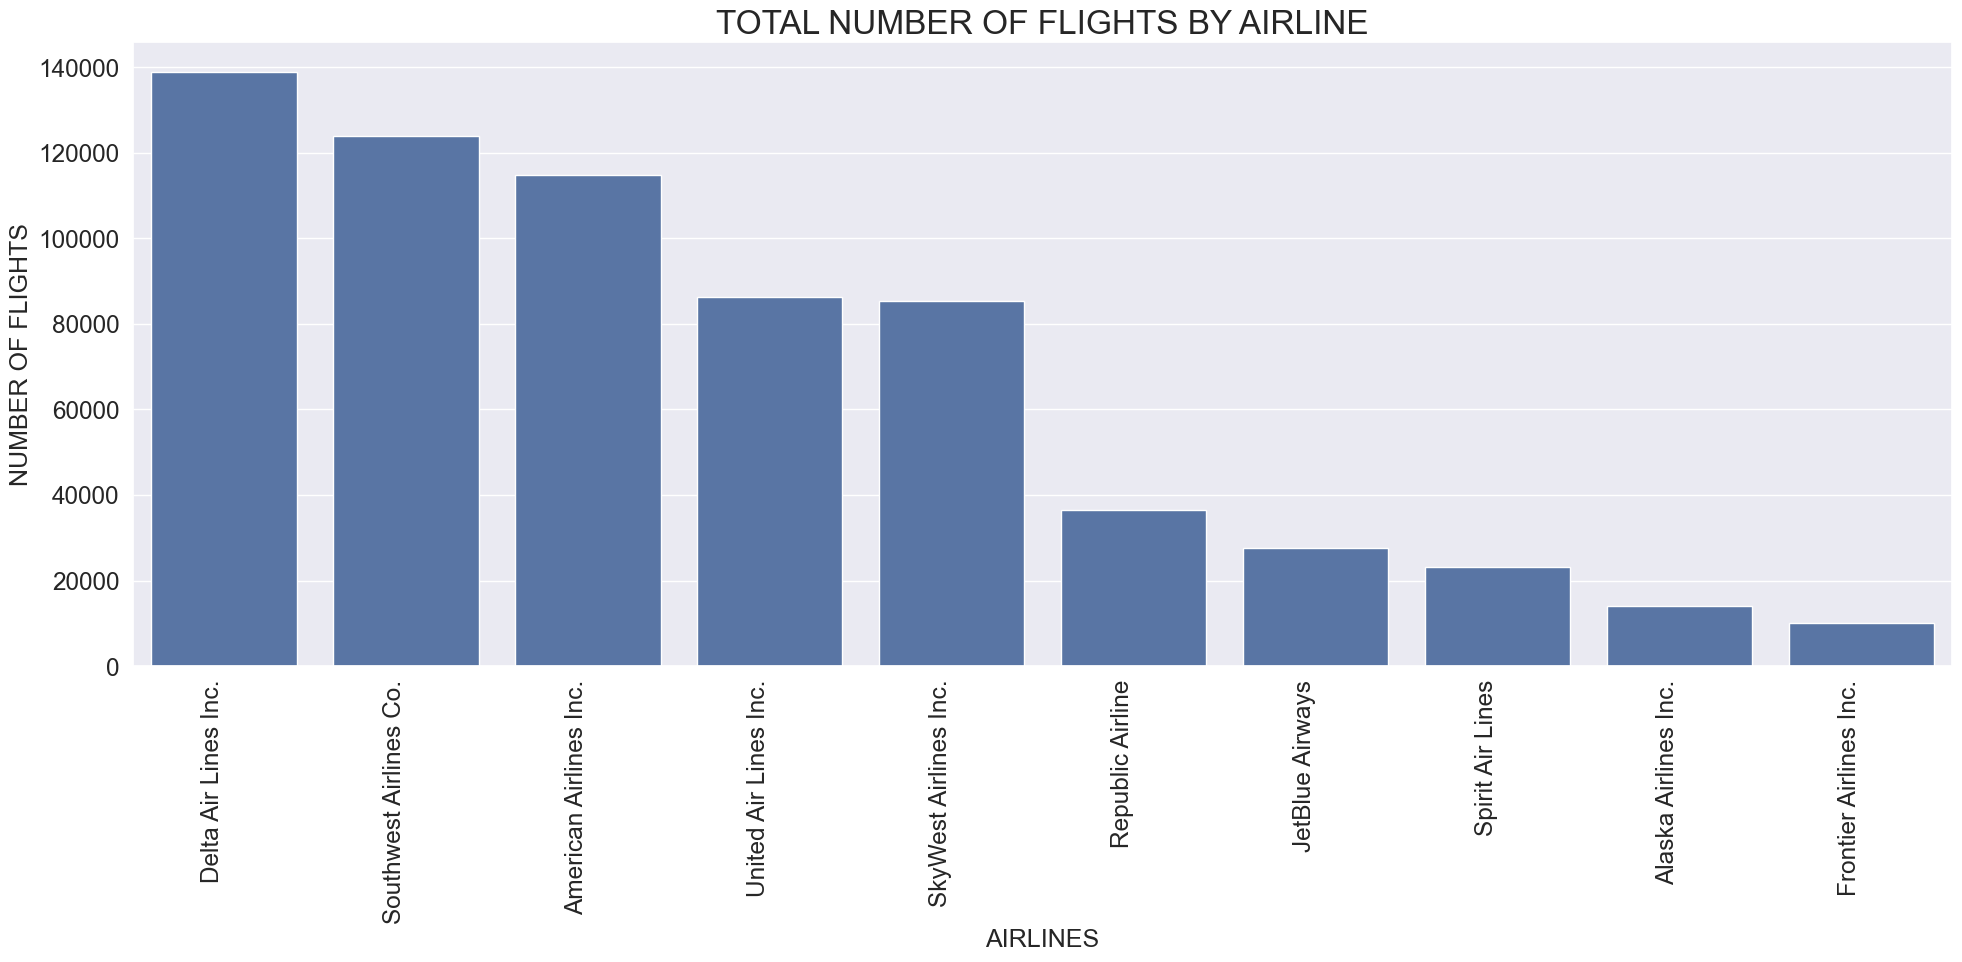

In [16]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=dfm['AIRLINE'], data=dfm, order=dfm['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINES', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()


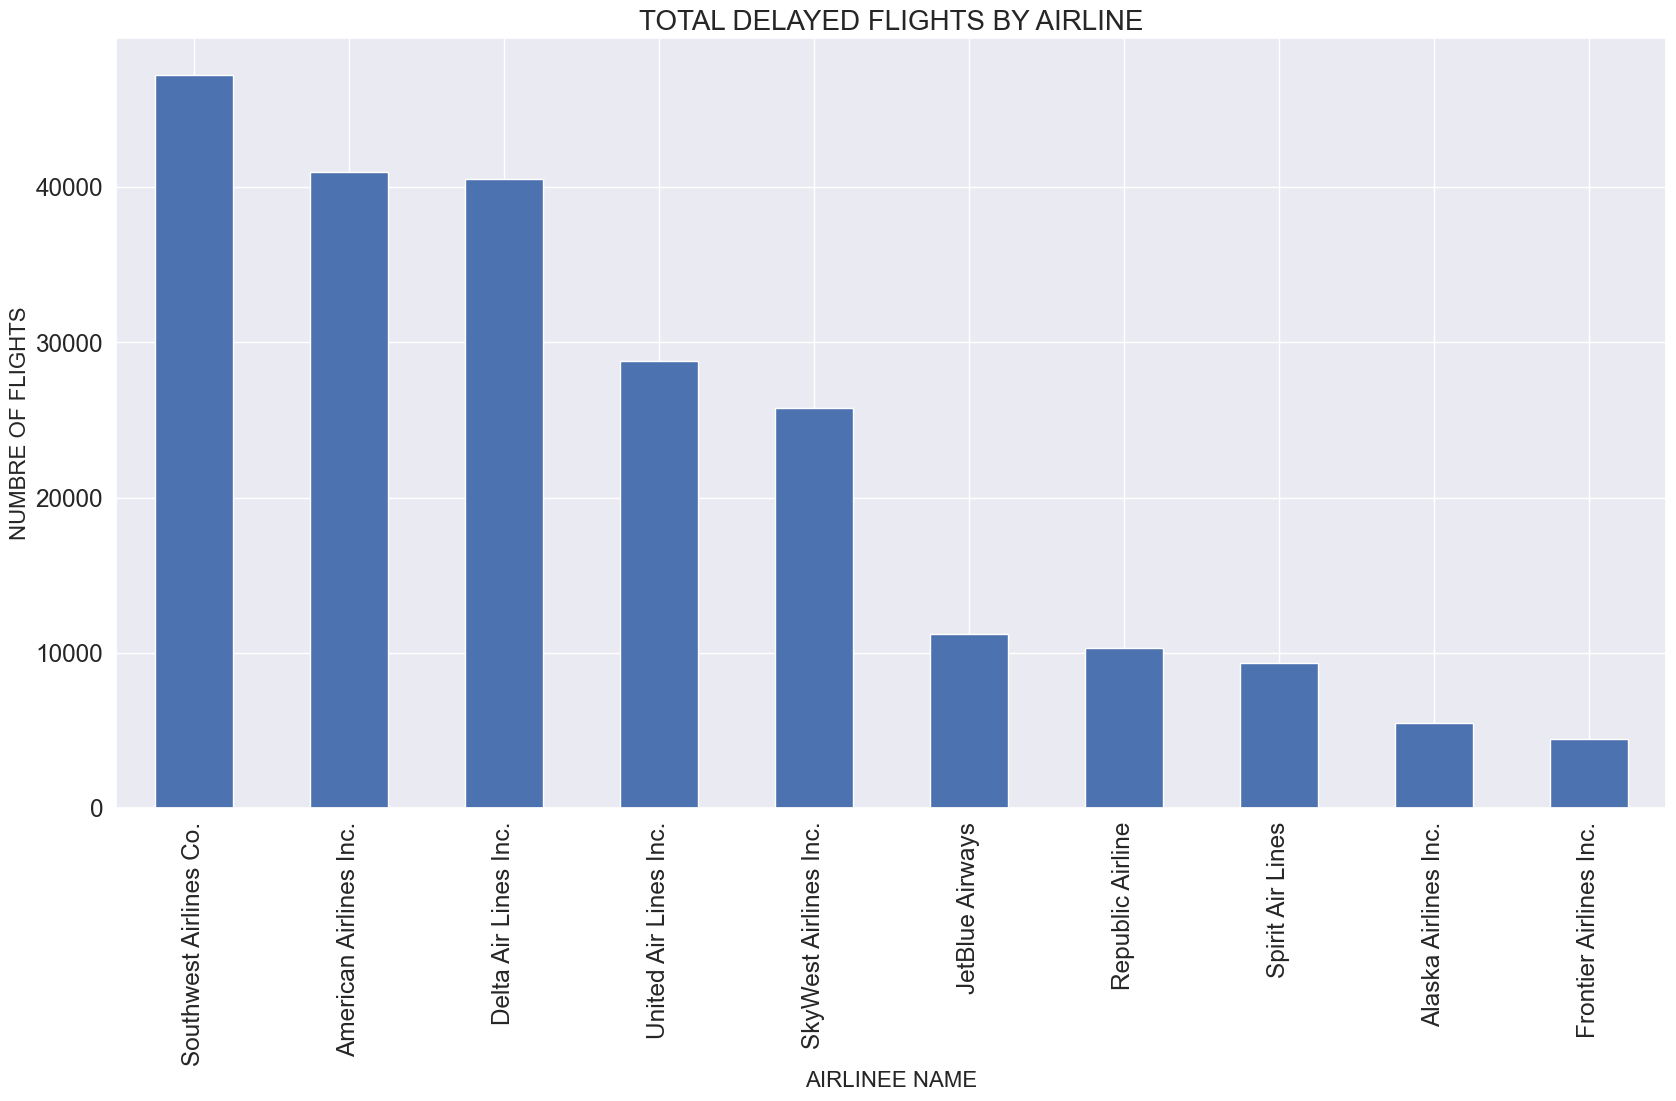

In [17]:
plt.figure(figsize=(20, 10))
dfm.groupby('AIRLINE').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [18]:
df1_PFD = dfm[['AIRLINE', 'FLIGHT_STATUS']]
df1_PFD.head()

,AIRLINE,FLIGHT_STATUS
0,United Air Lines Inc.,1
1,Delta Air Lines Inc.,1
2,Spirit Air Lines,0
3,American Airlines Inc.,0
4,Spirit Air Lines,0


In [19]:
df1_PFD.FLIGHT_STATUS.value_counts()

FLIGHT_STATUS
0    436487
1    224195
Name: count, dtype: int64

In [20]:
test_1 = df1_PFD.groupby(['AIRLINE']).sum().reset_index()
test_2 = dfm.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='TOTAL_FLIGHTS')
df_fp = pd.merge(test_1, test_2, on='AIRLINE')
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)
df_fp.head(20)

,AIRLINE,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines Inc.,5512,14089,39.12
1,American Airlines Inc.,40975,114748,35.71
2,Delta Air Lines Inc.,40544,138937,29.18
3,Frontier Airlines Inc.,4471,10143,44.08
4,JetBlue Airways,11208,27707,40.45
5,Republic Airline,10342,36405,28.41
6,SkyWest Airlines Inc.,25757,85428,30.15
7,Southwest Airlines Co.,47229,123887,38.12
8,Spirit Air Lines,9367,23141,40.48
9,United Air Lines Inc.,28790,86197,33.40


In [21]:
SUM = df_fp.DELAYED_FLIGHTS.sum()

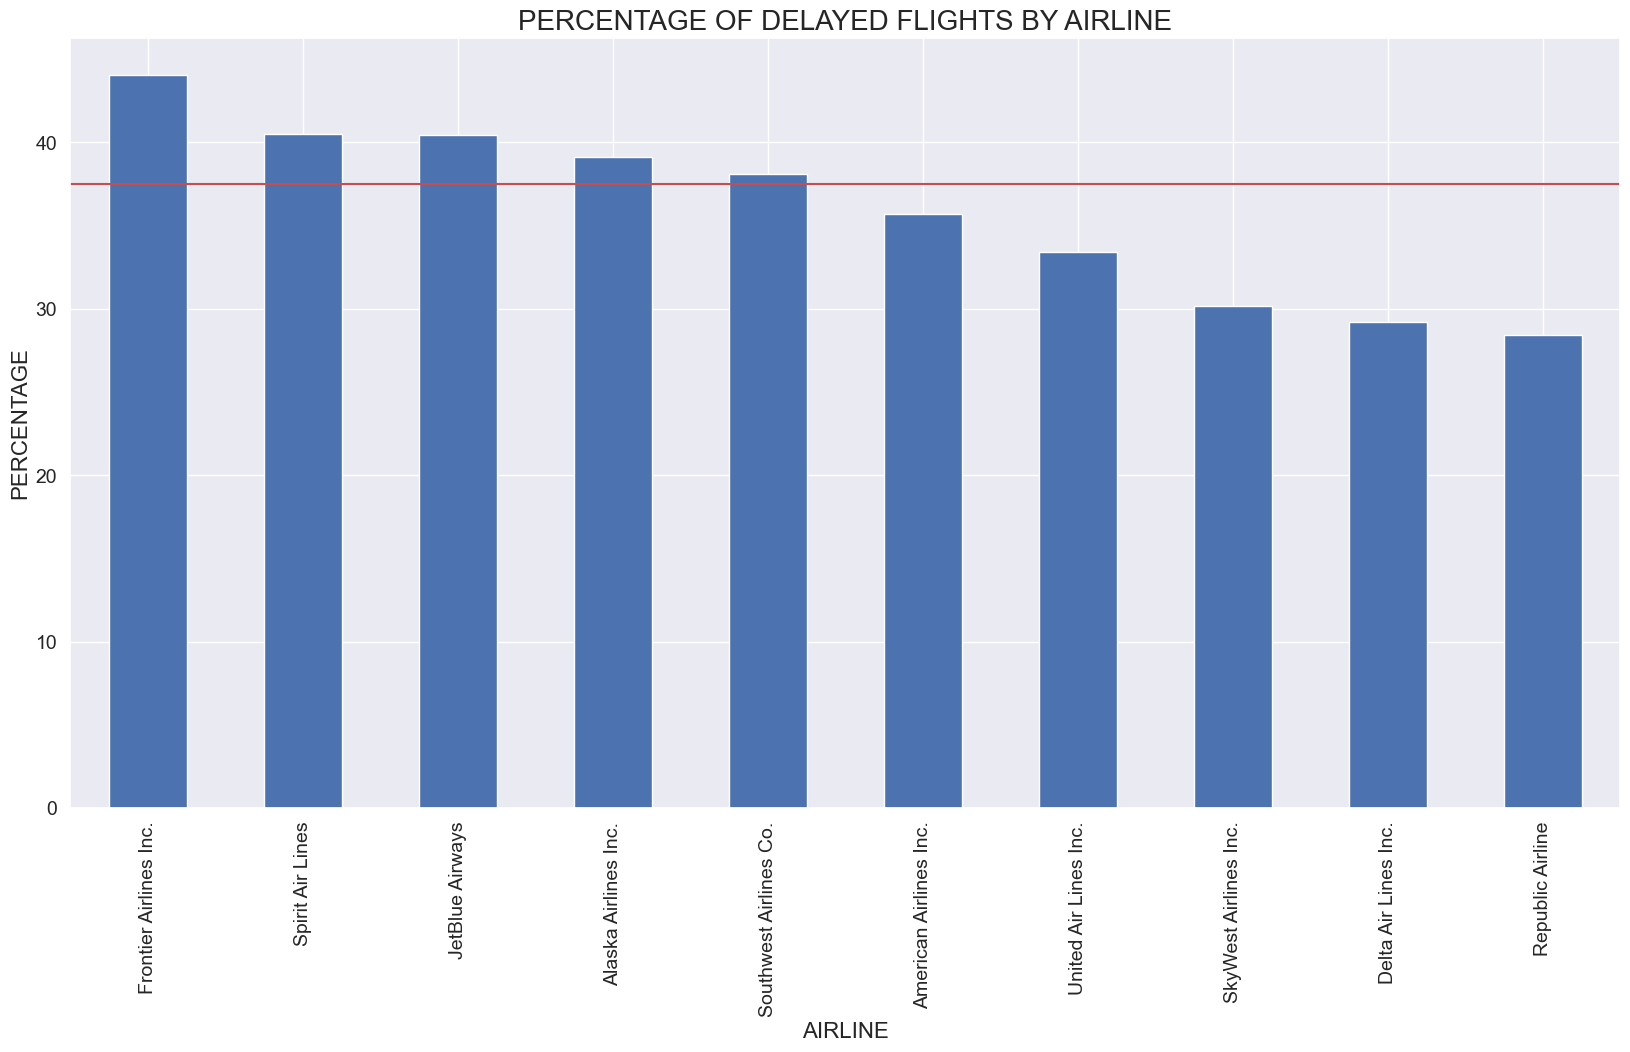

In [22]:
plt.figure(figsize=(20, 10))
df_fp.groupby('AIRLINE').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

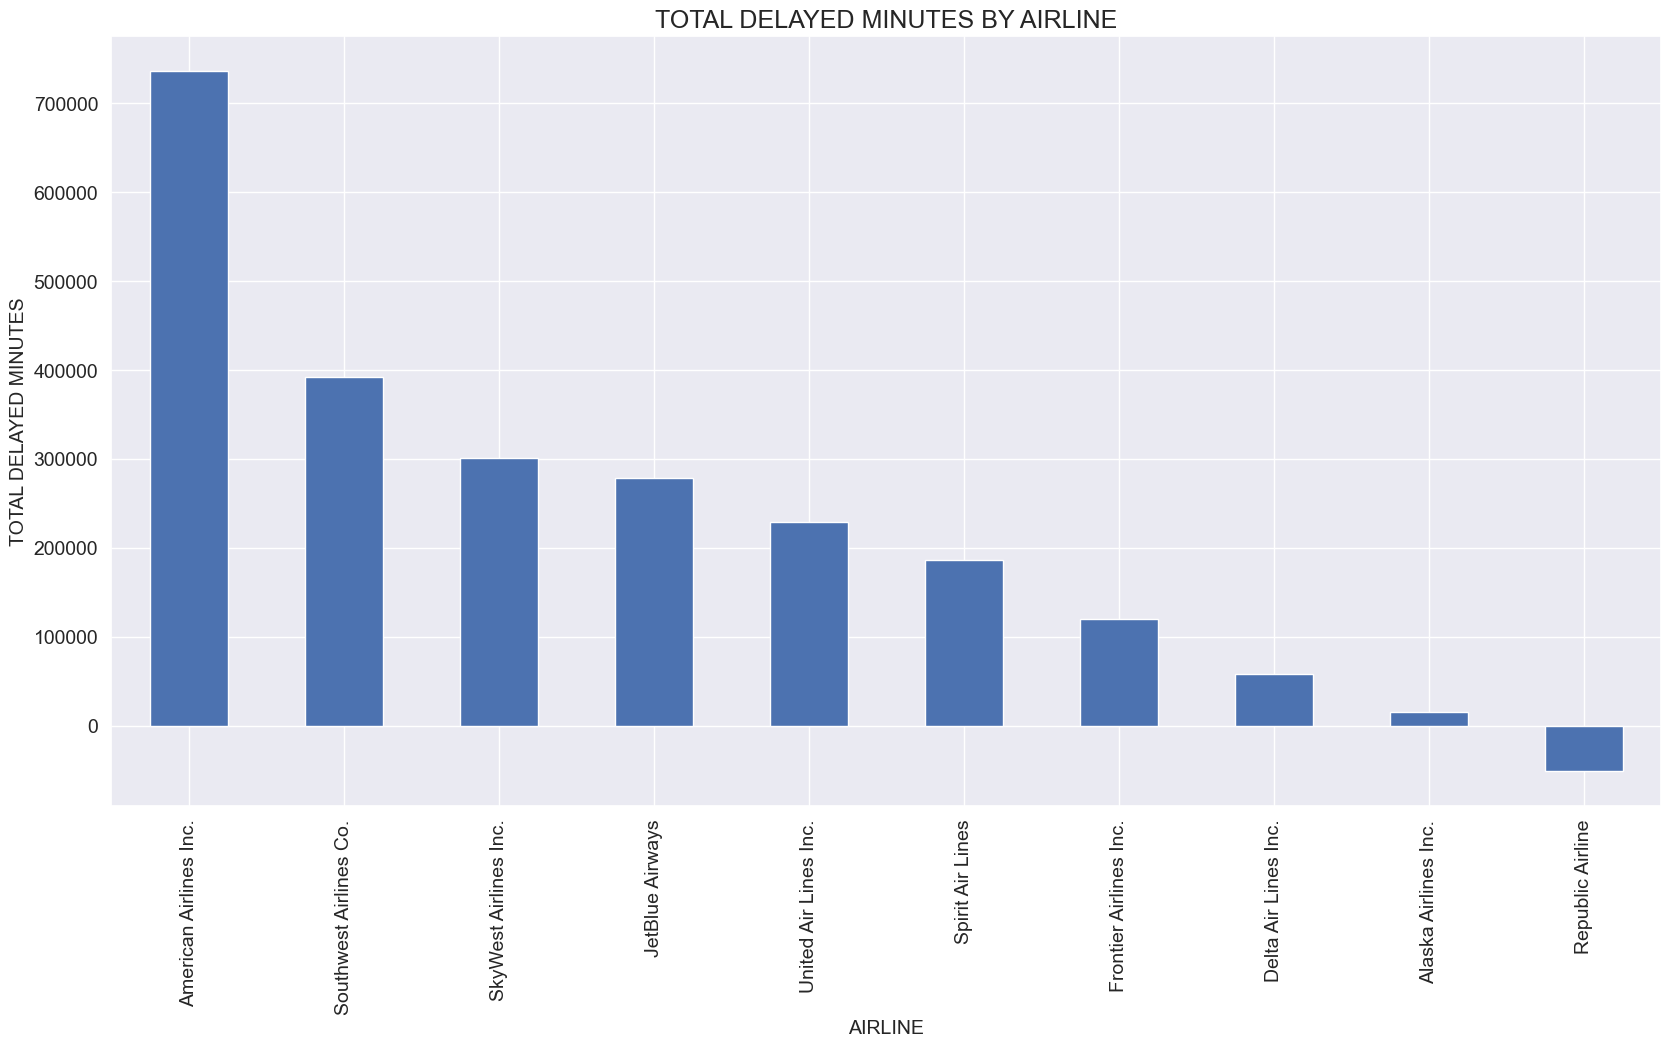

In [23]:
plt.figure(figsize=(20, 10))
dfm.groupby('AIRLINE').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [24]:
test_3 = dfm[['AIRLINE', 'ARR_DELAY']]
test_3 = test_3.groupby(['AIRLINE']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(10)

,AIRLINE,AVG_DELAY
0,Republic Airline,-1.396374
1,Delta Air Lines Inc.,0.421644
2,Alaska Airlines Inc.,1.110654
3,United Air Lines Inc.,2.653074
4,Southwest Airlines Co.,3.164053
5,SkyWest Airlines Inc.,3.519713
6,American Airlines Inc.,6.419903
7,Spirit Air Lines,8.072382
8,JetBlue Airways,10.053813
9,Frontier Airlines Inc.,11.796510


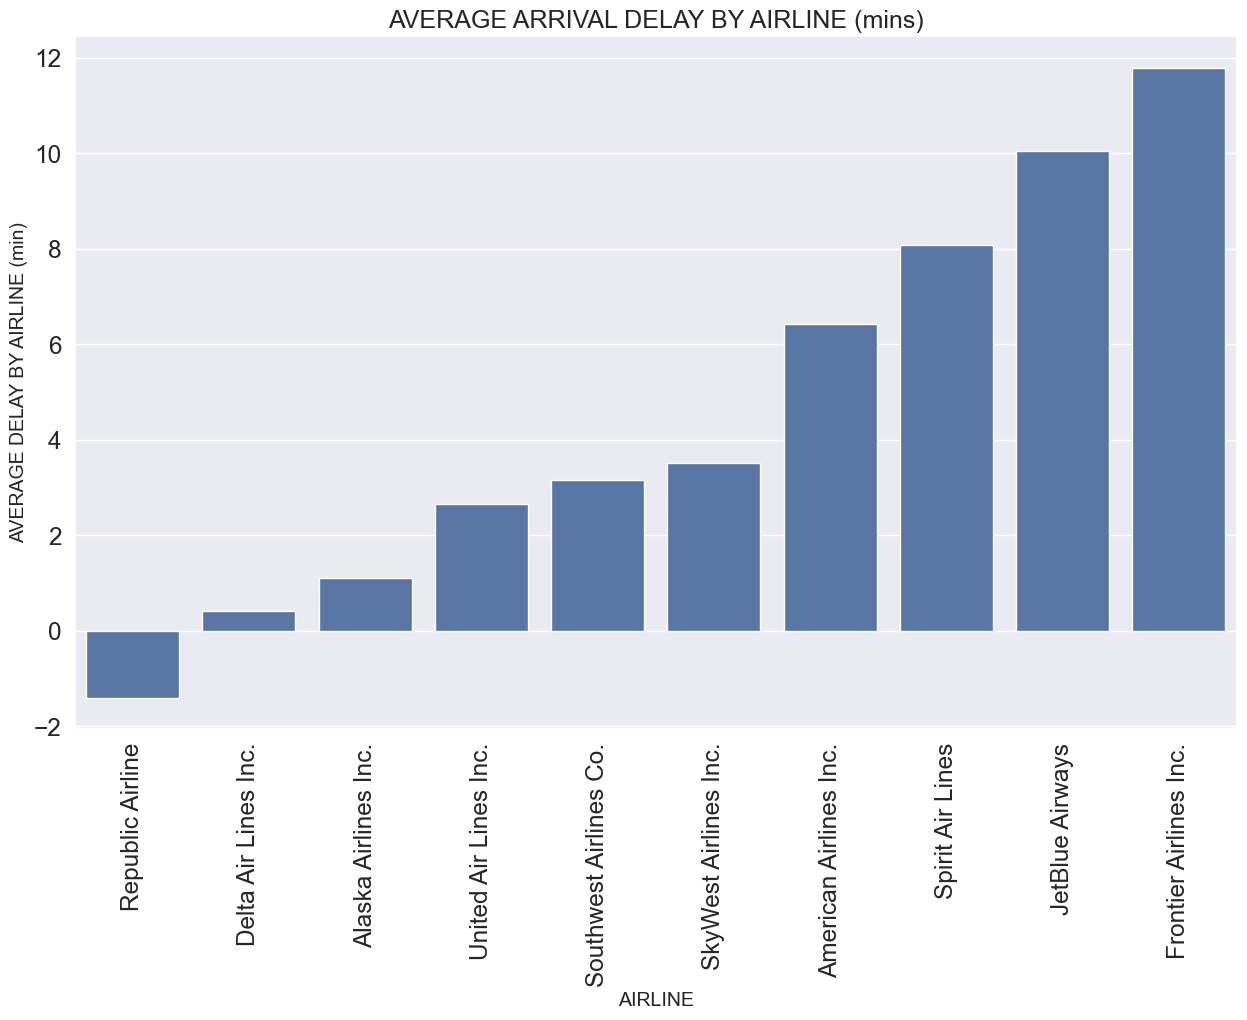

In [25]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AIRLINE', y='AVG_DELAY', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_ylabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
ax.set_xlabel('AIRLINE', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


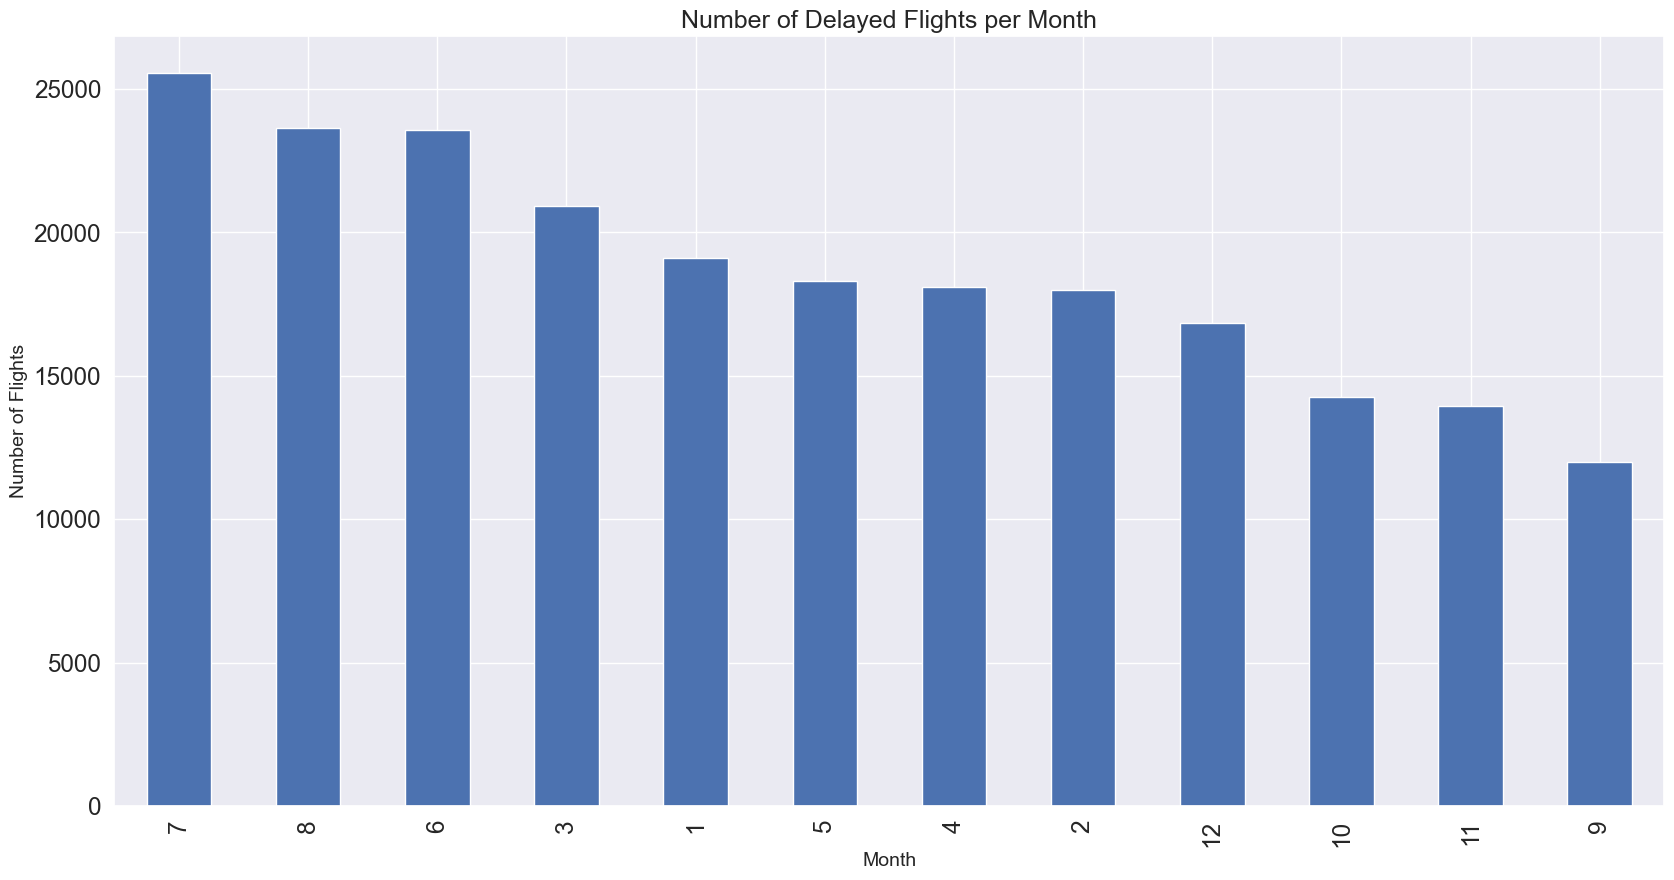

In [38]:
plt.figure(figsize=(20, 10))
dfm.groupby('MONTH').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

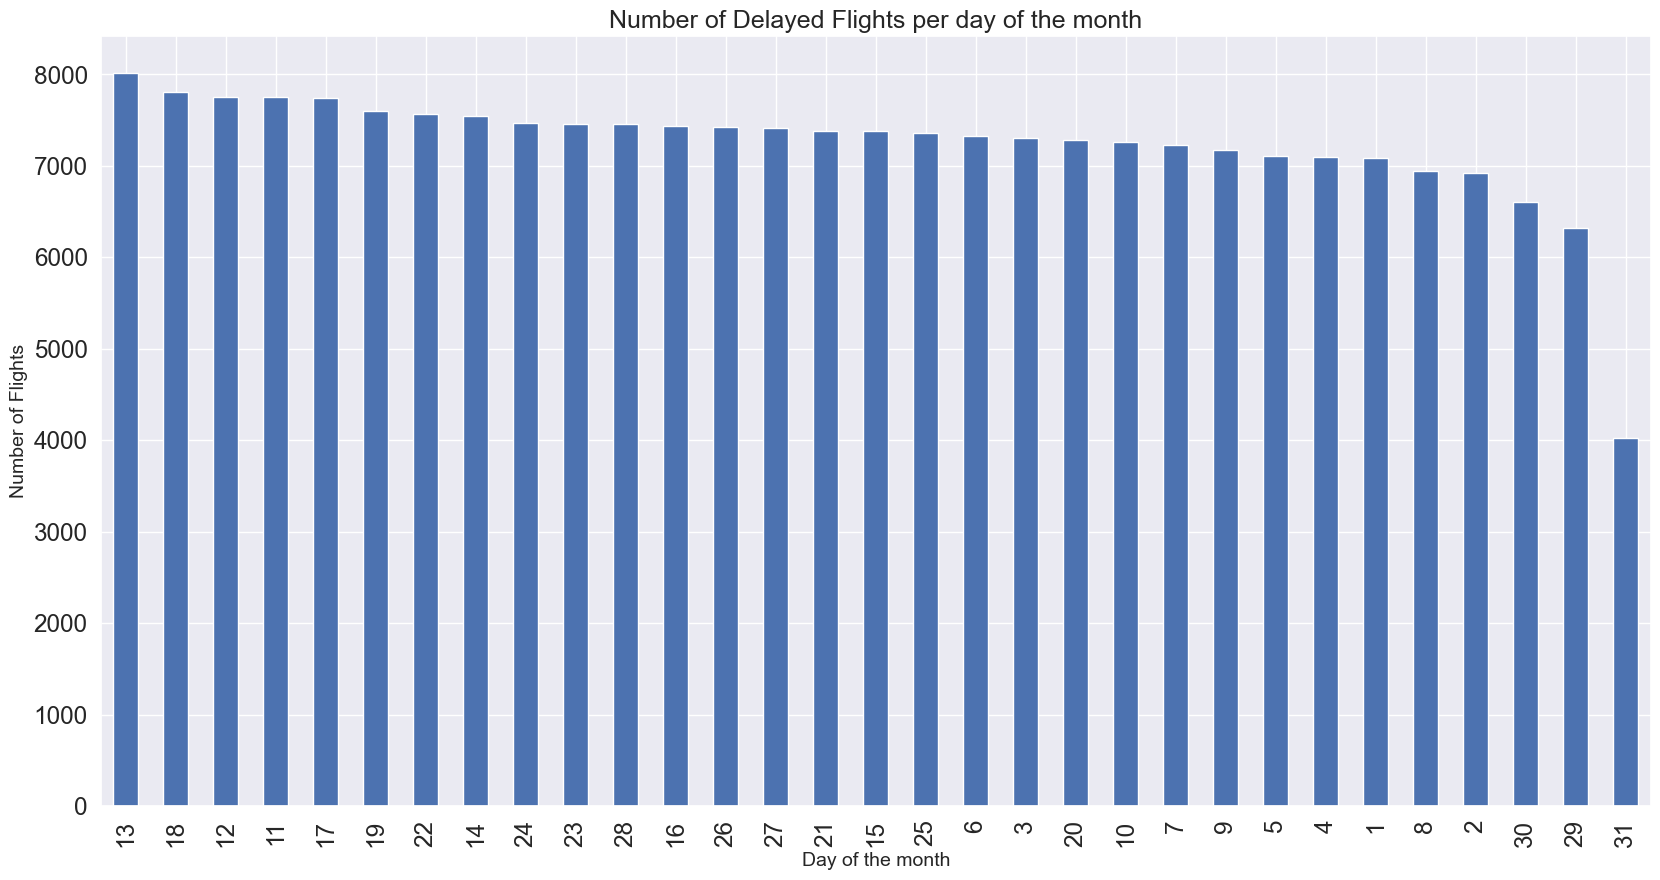

In [26]:
plt.figure(figsize=(20, 10))
dfm.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()